In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('salary_data_cleaned.csv')

In [3]:
df.head()

Job Title             Salary Estimate  \
0                      Data Analyst  $41K-$70K (Glassdoor est.)   
1                      Data Analyst  $41K-$70K (Glassdoor est.)   
2  Tactical Data Link (TDL) Analyst  $41K-$70K (Glassdoor est.)   
3    Finance Data Analytics Analyst  $41K-$70K (Glassdoor est.)   
4           Data Governance Analyst  $41K-$70K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Analyst – Laramie, WY\n\nTrihydro, one of...     4.4   
1  At TrialCard, our passion is success - success...     3.2   
2  Overview:\n\nOasis Systems has an exciting opp...     3.8   
3  Your Opportunity:\n\nSmithfield Foods is a $15...     3.3   
4  The Data Governance team of Decision Sciences ...     3.3   

                                  Company Name          Location  \
0                    Trihydro Corporation\n4.4       Laramie, WY   
1                         TrialCard, Inc.\n3.2   Morrisville, NC   
2                       Oasis Systems LLC\n3.8       Hampton, VA   
3                  Smithfield Foods, Inc.\n3.3    Smithfield, VA   
4  Government Employees Insurance Company\n3.3  Indianapolis, IN   

                     Size  Founded               Type of ownership  \
0   501 to 1000 Employees     1984               Company - Private   
1  1001 to 5000 Employees     2001               Company - Private   
2  1001 to 5000 Employees     1997               Company - Private   
3        10000+ Employees     1936  Subsidiary or Business Segment   
4        10000+ Employees     1936  Subsidiary or Business Segment   

                             Industry  ... avg_salary  \
0  Oil & Gas Exploration & Production  ...       55.5   
1             Advertising & Marketing  ...       55.5   
2                         IT Services  ...       55.5   
3       Food & Beverage Manufacturing  ...       55.5   
4                  Insurance Carriers  ...       55.5   

                                company_txt  job_state  age  python  r spark  \
0                    Trihydro Corporation\n         WY   36       0  0     0   
1                         TrialCard, Inc.\n         NC   19       0  0     0   
2                       Oasis Systems LLC\n         VA   23       0  0     0   
3                  Smithfield Foods, Inc.\n         VA   84       0  0     0   
4  Government Employees Insurance Company\n         IN   84       0  0     0   

   aws  excel  sql  
0    0      1    1  
1    0      1    1  
2    0      1    0  
3    0      1    1  
4    0      1    0  

[5 rows x 24 columns]

In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'sql'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data analyst' in title.lower():
        return 'data analyst'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
## Job description length 

#remove new line from job title

In [6]:
df['job_simp']  = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

data analyst      897
na                100
data scientist      1
manager             1
data engineer       1
Name: job_simp, dtype: int64

In [8]:
df['seniority']  = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        949
senior     48
jr          3
Name: seniority, dtype: int64

In [9]:
## Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3874
1      3468
2      4033
3      3929
4      3806
       ... 
995    2193
996    1036
997    2787
998    3810
999    3475
Name: desc_len, Length: 1000, dtype: int64

In [10]:
## remove new line from job title
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n',''))

In [11]:
df.describe()

Rating    Founded   min_salary   max_salary   avg_salary  \
count  1000.000000  1000.0000  1000.000000  1000.000000  1000.000000   
mean      3.324000  1415.2110    46.971000    83.447000    65.209000   
std       1.505254   899.5284    11.096634    18.201662    14.158859   
min      -1.000000    -1.0000    29.000000    55.000000    42.000000   
25%       3.100000    -1.0000    40.000000    71.500000    58.250000   
50%       3.600000  1982.0000    44.000000    79.000000    61.500000   
75%       4.100000  2002.2500    50.500000    89.000000    69.625000   
max       5.000000  2019.0000    76.000000   131.000000   103.500000   

              age       python            r        spark          aws  \
count  1000.00000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     24.47500     0.308000     0.001000     0.039000     0.130000   
std      35.77568     0.461898     0.031623     0.193692     0.336472   
min      -1.00000     0.000000     0.000000     0.000000     0.000000   
25%      -1.00000     0.000000     0.000000     0.000000     0.000000   
50%      14.00000     0.000000     0.000000     0.000000     0.000000   
75%      31.00000     1.000000     0.000000     0.000000     0.000000   
max     395.00000     1.000000     1.000000     1.000000     1.000000   

             excel          sql      desc_len  
count  1000.000000  1000.000000   1000.000000  
mean      0.677000     0.629000   3207.385000  
std       0.467857     0.483314   1530.693732  
min       0.000000     0.000000     92.000000  
25%       0.000000     0.000000   2147.750000  
50%       1.000000     1.000000   3081.500000  
75%       1.000000     1.000000   4102.000000  
max       1.000000     1.000000  11944.000000

<AxesSubplot:>

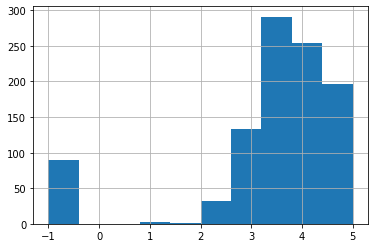

In [12]:
df.Rating.hist()

<AxesSubplot:>

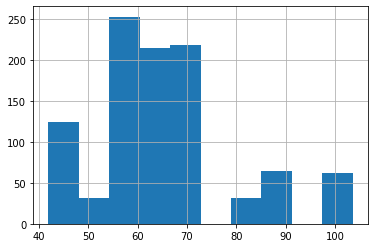

In [13]:
df.avg_salary.hist()

<AxesSubplot:>

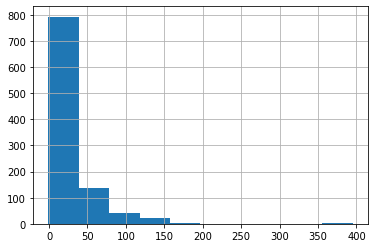

In [14]:
df.age.hist()

<AxesSubplot:>

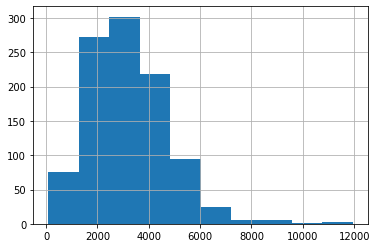

In [15]:
df.desc_len.hist()

<AxesSubplot:>

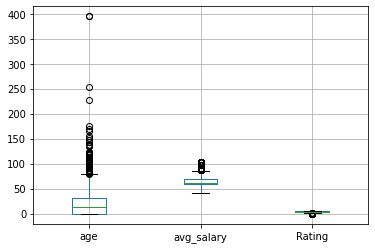

In [16]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

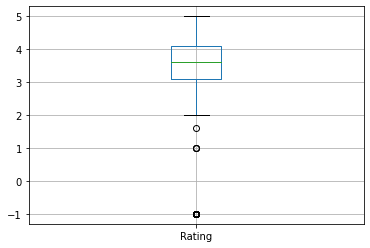

In [17]:
df.boxplot(column = ['Rating'])

In [18]:
df[['age','avg_salary','Rating','desc_len']].corr()

age  avg_salary    Rating  desc_len
age         1.000000   -0.062666  0.126619  0.134104
avg_salary -0.062666    1.000000 -0.041619  0.036597
Rating      0.126619   -0.041619  1.000000 -0.001955
desc_len    0.134104    0.036597 -0.001955  1.000000

<AxesSubplot:>

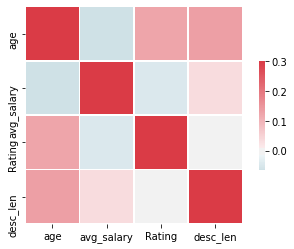

In [19]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [20]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'sql', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [22]:
df_cat = df[['Location','Size','Type of ownership','Industry', 'Sector', 'Revenue','company_txt', 'job_state','python', 'r', 'spark','aws', 'excel', 'sql', 'job_simp', 'seniority']]

graph for Location: total = 299


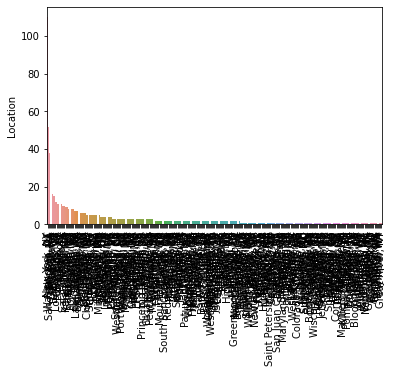

graph for Size: total = 9


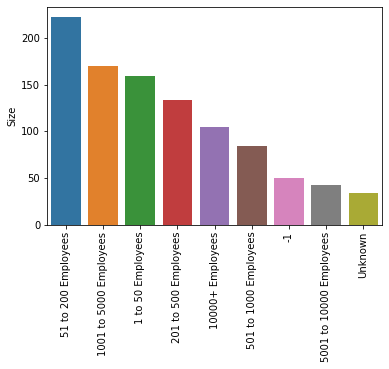

graph for Type of ownership: total = 13


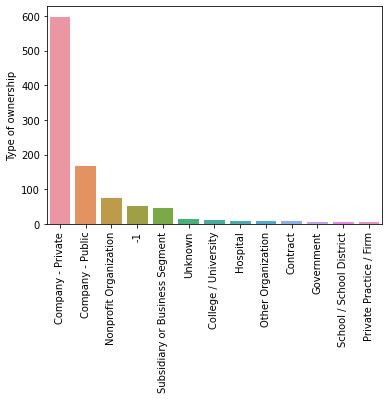

graph for Industry: total = 72


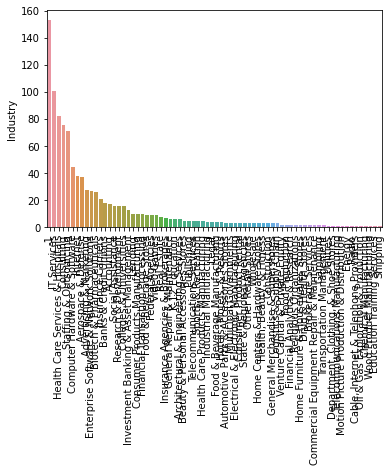

graph for Sector: total = 24


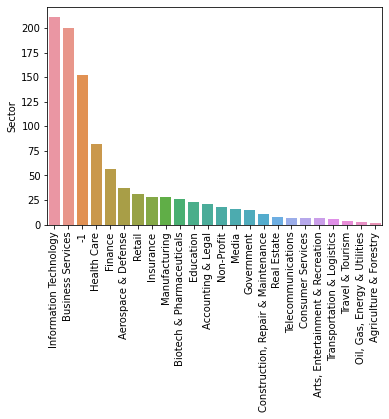

graph for Revenue: total = 14


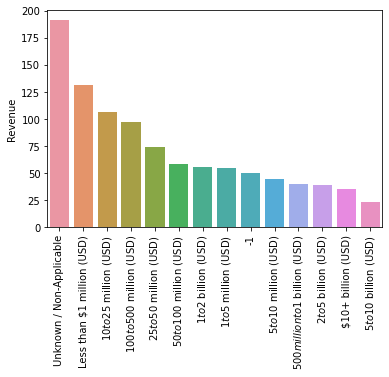

graph for company_txt: total = 602


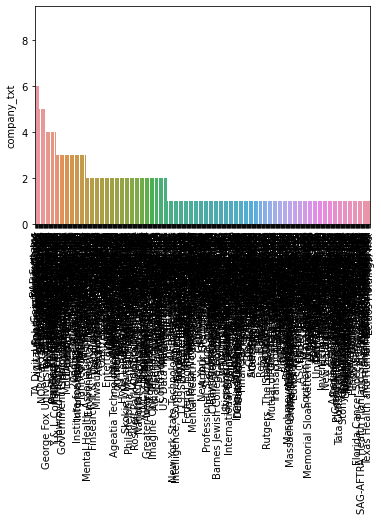

graph for job_state: total = 42


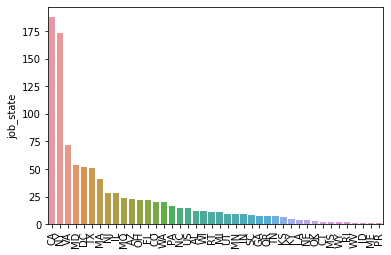

graph for python: total = 2


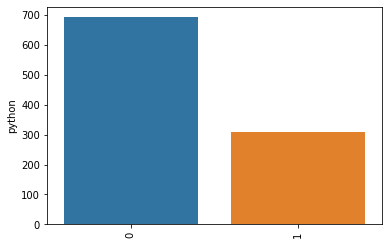

graph for r: total = 2


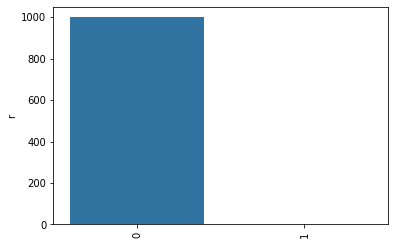

graph for spark: total = 2


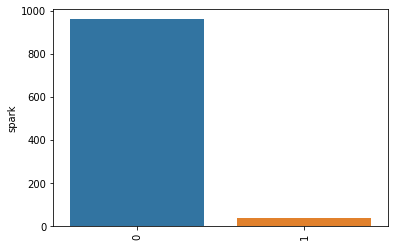

graph for aws: total = 2


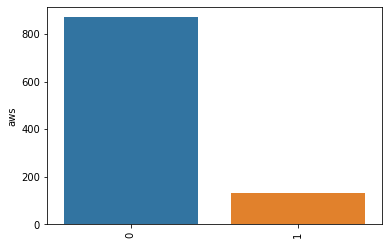

graph for excel: total = 2


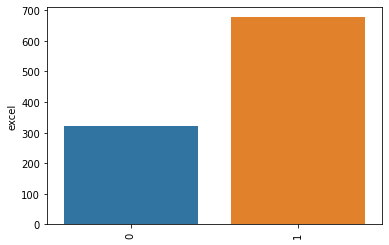

graph for sql: total = 2


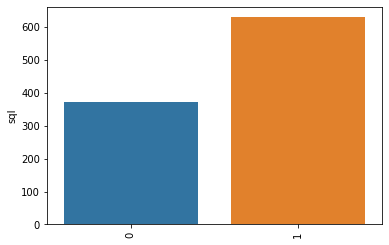

graph for job_simp: total = 5


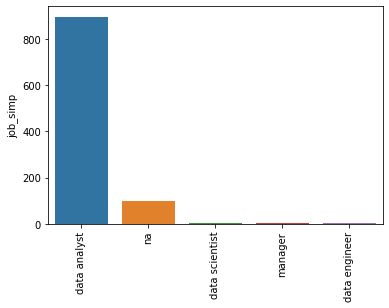

graph for seniority: total = 3


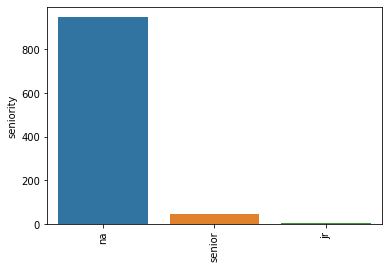

In [30]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for %s: total = %d' % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


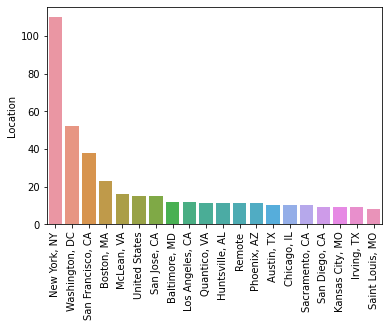

graph for company_txt: total = 20


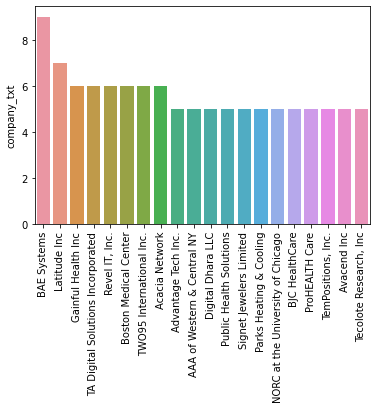

graph for job_state: total = 20


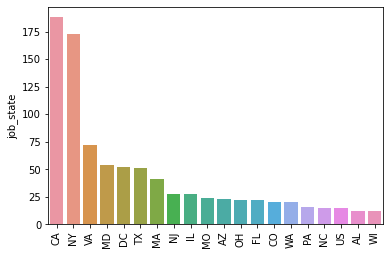

In [32]:
for i in df_cat[['Location','company_txt','job_state']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for %s: total = %d' % (i,len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [33]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'sql', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [34]:
pd.pivot_table(df, index='job_simp', values='avg_salary')

avg_salary
job_simp                  
data analyst      65.30825
data engineer     90.00000
data scientist    66.50000
manager           71.50000
na                63.99500

In [35]:
pd.pivot_table(df, index=['job_simp','seniority'], values='avg_salary')

avg_salary
job_simp       seniority            
data analyst   jr          57.000000
               na          65.503476
               senior      60.677419
data engineer  na          90.000000
data scientist na          66.500000
manager        senior      71.500000
na             na          63.428571
               senior      66.968750

In [42]:
pd.set_option('display.max_rows', None)
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
WY        data analyst     52.500000
WV        data analyst     55.500000
WI        na               72.000000
          data analyst     60.312500
WA        na               73.250000
          data analyst     69.250000
VA        na               64.384615
          data analyst     65.186441
UT        data analyst     58.166667
US        data analyst     69.500000
TX        na               55.500000
          data analyst     65.826531
TN        data analyst     78.500000
SC        na               49.000000
          data analyst     56.500000
RT        na               56.000000
          data analyst     72.450000
RI        data analyst     86.500000
PR        data analyst     71.500000
PA        na               85.000000
          data analyst     63.666667
OR        na               65.000000
          data analyst     73.300000
OK        na               65.000000
          data analyst     70.500000
OH        na               76.333333
          data analyst     63.421053
NY        na               62.954545
          data analyst     64.456954
NJ        na               54.375000
          data analyst     66.250000
NE        data analyst     60.500000
          na               54.500000
NC        data analyst     65.966667
MS        data analyst     69.250000
MO        na               47.500000
          data analyst     63.934783
MN        data analyst     67.277778
MI        na               85.000000
          manager          71.500000
          data analyst     67.500000
ME        data analyst     47.500000
MD        na               74.800000
          data scientist   66.500000
          data analyst     64.229167
MA        na               54.750000
          data analyst     64.971429
LA        data analyst     70.250000
KY        na               88.000000
          data analyst     65.500000
KS        data analyst     67.000000
IN        data analyst     51.250000
          na               57.500000
IL        na               47.500000
          data engineer    90.000000
          data analyst     64.634615
ID        data analyst     47.500000
GA        data analyst     52.357143
FL        na               51.500000
          data analyst     58.500000
DC        na               59.500000
          data analyst     64.581633
CT        data analyst     81.500000
CO        na               85.000000
          data analyst     61.052632
CA        na               68.208333
          data analyst     67.349432
AZ        data analyst     69.409091
          na               55.500000
AL        na               57.125000
          data analyst     61.437500

In [43]:
pd.pivot_table(df, index=['job_state','job_simp'], values='avg_salary', aggfunc='count').sort_values('job_state', ascending=False)

avg_salary
job_state job_simp                  
WY        data analyst             2
WV        data analyst             1
WI        na                       4
          data analyst             8
WA        na                       2
          data analyst            18
VA        na                      13
          data analyst            59
UT        data analyst             9
US        data analyst            15
TX        na                       2
          data analyst            49
TN        data analyst             7
SC        na                       2
          data analyst             6
RT        na                       1
          data analyst            10
RI        data analyst             2
PR        data analyst             1
PA        na                       1
          data analyst            15
OR        na                       2
          data analyst             5
OK        na                       1
          data analyst             2
OH        na                       3
          data analyst            19
NY        na                      22
          data analyst           151
NJ        na                       4
          data analyst            24
NE        data analyst             3
          na                       1
NC        data analyst            15
MS        data analyst             2
MO        na                       1
          data analyst            23
MN        data analyst             9
MI        na                       2
          manager                  1
          data analyst             8
ME        data analyst             1
MD        na                       5
          data scientist           1
          data analyst            48
MA        na                       6
          data analyst            35
LA        data analyst             4
KY        na                       1
          data analyst             4
KS        data analyst             6
IN        data analyst             6
          na                       3
IL        na                       1
          data engineer            1
          data analyst            26
ID        data analyst             1
GA        data analyst             7
FL        na                       2
          data analyst            20
DC        na                       3
          data analyst            49
CT        data analyst             2
CO        na                       1
          data analyst            19
CA        na                      12
          data analyst           176
AZ        data analyst            22
          na                       1
AL        na                       4
          data analyst             8

In [45]:
pd.pivot_table(df[df.job_simp == 'data analyst'], index='job_state', values='avg_salary').sort_values('avg_salary', ascending=False)

avg_salary
job_state            
RI          86.500000
CT          81.500000
TN          78.500000
OR          73.300000
RT          72.450000
PR          71.500000
OK          70.500000
LA          70.250000
US          69.500000
AZ          69.409091
MS          69.250000
WA          69.250000
MI          67.500000
CA          67.349432
MN          67.277778
KS          67.000000
NJ          66.250000
NC          65.966667
TX          65.826531
KY          65.500000
VA          65.186441
MA          64.971429
IL          64.634615
DC          64.581633
NY          64.456954
MD          64.229167
MO          63.934783
PA          63.666667
OH          63.421053
AL          61.437500
CO          61.052632
NE          60.500000
WI          60.312500
FL          58.500000
UT          58.166667
SC          56.500000
WV          55.500000
WY          52.500000
GA          52.357143
IN          51.250000
ME          47.500000
ID          47.500000

In [46]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'min_salary', 'max_salary',
       'avg_salary', 'company_txt', 'job_state', 'age', 'python', 'r', 'spark',
       'aws', 'excel', 'sql', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [ ]:
# rating, industry, sector, revenue, python, r, spark, aws, excel, sql, desc_len, Type of ownership

In [54]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'python', 'r', 'spark', 'aws', 'excel', 'sql', 'Type of ownership','avg_salary']]

In [55]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
 2.1    103.500000
 1.0     74.333333
 2.5     70.545455
 4.7     68.227273
 2.7     68.060000
 5.0     67.838462
 3.9     67.824074
 2.9     67.774194
 3.4     67.678571
 4.3     67.676471
 3.1     67.421875
-1.0     67.117978
 2.8     66.966667
 4.2     66.369565
 2.6     66.000000
 4.0     65.625000
 4.1     64.968750
 3.6     64.839623
 4.5     64.767442
 3.5     64.746269
 2.4     64.166667
 4.8     64.031250
 3.2     63.772727
 3.8     63.133333
 3.0     62.730769
 3.3     62.031250
 4.6     62.029412
 4.4     60.725806
 3.7     59.756757
 2.3     59.590909
 4.9     59.357143
 2.0     56.000000
 1.6     55.500000
 2.2     47.500000
Industry
                                           avg_salary
Industry                                             
Radio                                       88.000000
Motion Picture Production & Distribution    88.000000
Department, Clothing, & Shoe Stores         88.000000
Chemical Manufacturing        

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [60]:
pd.pivot_table(df_pivots, index='Revenue', columns='python', values='avg_salary', aggfunc='count')

python                              0   1
Revenue                                  
$1 to $2 billion (USD)             37  19
$1 to $5 million (USD)             34  21
$10 to $25 million (USD)           85  21
$10+ billion (USD)                 24  11
$100 to $500 million (USD)         67  30
$2 to $5 billion (USD)             30   9
$25 to $50 million (USD)           56  18
$5 to $10 billion (USD)            12  11
$5 to $10 million (USD)            32  13
$50 to $100 million (USD)          47  11
$500 million to $1 billion (USD)   34   6
-1                                 31  19
Less than $1 million (USD)         88  43
Unknown / Non-Applicable          115  76

In [69]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

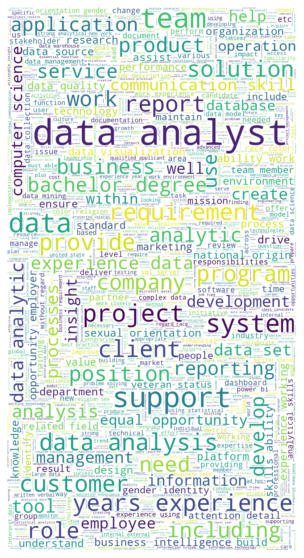

In [72]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()